**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [35]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [36]:
#%%pycodestyle
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KDTree

In [72]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = X
        self.y = y
        if (self.algorithm == 'kd_tree'):
            self.tree = KDTree(X)

    def predict(self, X):
        if (self.algorithm == 'brute'):
            dist = pairwise_distances(X, self.X_train)
            index = np.argpartition(dist, (self.n_neighbors))
            index = index[:, :self.n_neighbors]
        else:
            _, index = self.tree.query(X, k=self.n_neighbors)
        class_near_point = self.y[index].astype(int)
        nearest_class = list(map(lambda x: np.argmax(np.bincount(x)),
                                 class_near_point))
        return np.array(nearest_class)

    def predict_proba(self, X):
        if (self.algorithm == 'brute'):
            dist = pairwise_distances(X, self.X_train)
            index = np.argpartition(dist, (self.n_neighbors))
            index = index[:, :self.n_neighbors]
        else:
            _, index = self.tree.query(X, k=self.n_neighbors)
        self.shape = len(set(self.y))
        class_near_point = self.y[index].astype(int)
        nearest_class = map(lambda x: np.bincount(x, minlength=self.shape),
                            class_near_point)
        return np.array(list(nearest_class))/self.n_neighbors

    def score(self, X, y):
        return len([x for x in self.predict(X) - np.array(y) if x == 0])/len(y)

**IRIS**

In [38]:
iris = datasets.load_iris()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [40]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [41]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [42]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [43]:
%time clf.predict(X_test)

Wall time: 999 µs


array([2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0])

In [44]:
%time my_clf.predict(X_test)

Wall time: 997 µs


array([2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0], dtype=int64)

In [45]:
%time clf.predict_proba(X_test)

Wall time: 999 µs


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [46]:
%time my_clf.predict_proba(X_test)

Wall time: 998 µs


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [47]:
clf.score(X_test, y_test)

1.0

In [48]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Лучший показатель n_neighbors =  10


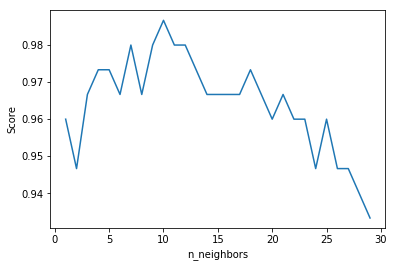

In [49]:
#%%pycodestyle
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline
A = []
for i in range(1, 30):
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    score = cross_val_score(my_clf, iris.data, iris.target, cv=5)
    A.append(score.mean())
plt.xlabel(u'n_neighbors')
plt.ylabel(u'Score')
plt.plot(range(1, 30), A)
print ("Лучший показатель n_neighbors = ",np.argmax(A)+1)

**MNIST**

In [50]:
mnist = fetch_mldata('MNIST original')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [52]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm = 'brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [53]:
%time clf.fit(X_train, y_train)

Wall time: 9.99 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [54]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [55]:
%time clf.predict(X_test)

Wall time: 3.63 s


array([6., 9., 0., 8., 2., 8., 4., 4., 8., 0., 1., 7., 6., 2., 1., 0., 9.,
       3., 4., 0., 8., 1., 3., 6., 2., 4., 7., 5., 8., 2., 7., 7., 7., 7.,
       0., 9., 6., 6., 0., 1., 3., 8., 8., 8., 1., 6., 2., 6., 2., 0., 1.,
       0., 6., 5., 5., 1., 3., 4., 9., 2., 9., 8., 3., 5., 0., 1., 5., 7.,
       7., 6., 8., 2., 7., 9., 1., 5., 5., 6., 0., 8., 6., 2., 2., 0., 0.,
       7., 8., 6., 1., 5., 6., 6., 5., 2., 6., 4., 7., 3., 0., 7., 9., 4.,
       7., 9., 1., 8., 1., 1., 7., 3., 8., 4., 2., 1., 3., 1., 0., 4., 5.,
       1., 1., 0., 6., 7., 4., 8., 1., 2., 6., 8., 6., 0., 8., 7., 4., 0.,
       1., 1., 5., 5., 5., 0., 5., 3., 5., 1., 5., 0., 5., 6., 7., 4., 7.,
       6., 5., 0., 2., 7., 7., 5., 1., 0., 9., 4., 4., 2., 9., 0., 1., 4.,
       4., 6., 5., 7., 1., 7., 5., 8., 4., 3., 3., 6., 1., 3., 7., 2., 1.,
       0., 3., 4., 7., 6., 7., 9., 7., 7., 4., 5., 3., 4., 6., 2., 8., 2.,
       9., 1., 8., 1., 8., 7., 9., 6., 3., 5., 3., 7., 3., 0., 1., 1., 2.,
       4., 3., 0., 6., 8.

In [56]:
%time  my_clf.predict(X_test)

Wall time: 3.76 s


array([6, 9, 0, 8, 2, 8, 4, 4, 8, 0, 1, 7, 6, 2, 1, 0, 9, 3, 4, 0, 8, 1,
       3, 6, 2, 4, 7, 5, 8, 2, 7, 7, 7, 7, 0, 9, 6, 6, 0, 1, 3, 8, 8, 8,
       1, 6, 2, 6, 2, 0, 1, 0, 6, 5, 5, 1, 3, 4, 9, 2, 9, 8, 3, 5, 0, 1,
       5, 7, 7, 6, 8, 2, 7, 9, 1, 5, 5, 6, 0, 8, 6, 2, 2, 0, 0, 7, 8, 6,
       1, 5, 6, 6, 5, 2, 6, 4, 7, 3, 0, 7, 9, 4, 7, 9, 1, 8, 1, 1, 7, 3,
       8, 4, 2, 1, 3, 1, 0, 4, 5, 1, 1, 0, 6, 7, 4, 8, 1, 2, 6, 8, 6, 0,
       8, 7, 4, 0, 1, 1, 5, 5, 5, 0, 5, 3, 5, 1, 5, 0, 5, 6, 7, 4, 7, 6,
       5, 0, 2, 7, 7, 5, 1, 0, 9, 4, 4, 2, 9, 0, 1, 4, 4, 6, 5, 7, 1, 7,
       5, 8, 4, 3, 3, 6, 1, 3, 7, 2, 1, 0, 3, 4, 7, 6, 7, 9, 7, 7, 4, 5,
       3, 4, 6, 2, 8, 2, 9, 1, 8, 1, 8, 7, 9, 6, 3, 5, 3, 7, 3, 0, 1, 1,
       2, 4, 3, 0, 6, 8, 1, 5, 9, 7, 5, 9, 0, 5, 4, 9, 9, 5, 1, 2, 9, 7,
       0, 7, 1, 5, 2, 0, 0, 3, 9, 5, 4, 8, 8, 2, 2, 1, 2, 9, 6, 9, 2, 2,
       8, 2, 7, 8, 3, 8, 8, 0, 8, 1, 7, 9, 2, 3, 3, 5, 1, 8, 6, 3, 6, 2,
       2, 4, 0, 2, 7, 7, 8, 5, 3, 5, 4, 4, 9, 4, 5,

In [57]:
%time clf.predict_proba(X_test)

Wall time: 3.41 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [58]:
%time my_clf.predict_proba(X_test)

Wall time: 3.83 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [59]:
clf.score(X_test, y_test)

0.9728571428571429

In [60]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [61]:
clf = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [63]:
%time clf.fit(X_train, y_train)

Wall time: 1min 4s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [64]:
%time my_clf.fit(X_train, y_train)

Wall time: 1min 4s


In [65]:
%time clf.predict(X_test)

Wall time: 1min 22s


array([6., 1., 1., 5., 0., 4., 7., 3., 5., 3., 9., 1., 6., 3., 4., 5., 2.,
       2., 1., 7., 7., 1., 1., 5., 6., 2., 9., 3., 0., 0., 3., 9., 6., 0.,
       8., 3., 4., 8., 6., 3., 3., 4., 1., 5., 6., 7., 1., 7., 7., 7., 7.,
       6., 3., 0., 1., 5., 1., 5., 0., 2., 3., 5., 3., 1., 3., 0., 5., 5.,
       1., 8., 0., 4., 8., 1., 6., 1., 4., 1., 4., 8., 2., 2., 9., 6., 1.,
       0., 0., 8., 7., 9., 0., 1., 4., 6., 7., 7., 4., 8., 8., 7., 1., 0.,
       0., 9., 9., 0., 0., 4., 2., 6., 8., 7., 6., 6., 7., 6., 5., 0., 1.,
       4., 0., 8., 5., 8., 5., 2., 9., 4., 0., 3., 8., 0., 5., 4., 0., 0.,
       3., 2., 9., 1., 7., 8., 2., 4., 4., 0., 9., 0., 2., 5., 6., 2., 6.,
       3., 0., 5., 6., 9., 3., 2., 6., 0., 2., 9., 7., 1., 3., 7., 9., 9.,
       1., 5., 6., 4., 0., 4., 6., 9., 4., 7., 5., 1., 2., 7., 1., 5., 1.,
       9., 4., 6., 9., 0., 3., 5., 6., 7., 5., 3., 3., 1., 1., 4., 9., 9.,
       8., 3., 1., 1., 9., 5., 7., 5., 3., 3., 9., 2., 0., 5., 7., 9., 8.,
       0., 2., 9., 6., 3.

In [66]:
%time my_clf.predict(X_test)

Wall time: 1min 5s


array([6, 1, 1, 5, 0, 4, 7, 3, 5, 3, 9, 1, 6, 3, 4, 5, 2, 2, 1, 7, 7, 1,
       1, 5, 6, 2, 9, 3, 0, 0, 3, 9, 6, 0, 8, 3, 4, 8, 6, 3, 3, 4, 1, 5,
       6, 7, 1, 7, 7, 7, 7, 6, 3, 0, 1, 5, 1, 5, 0, 2, 3, 5, 3, 1, 3, 0,
       5, 5, 1, 8, 0, 4, 8, 1, 6, 1, 4, 1, 4, 8, 2, 2, 9, 6, 1, 0, 0, 8,
       7, 9, 0, 1, 4, 6, 7, 7, 4, 8, 8, 7, 1, 0, 0, 9, 9, 0, 0, 4, 2, 6,
       8, 7, 6, 6, 7, 6, 5, 0, 1, 4, 0, 8, 5, 8, 5, 2, 9, 4, 0, 3, 8, 0,
       5, 4, 0, 0, 3, 2, 9, 1, 7, 8, 2, 4, 4, 0, 9, 0, 2, 5, 6, 2, 6, 3,
       0, 5, 6, 9, 3, 2, 6, 0, 2, 9, 7, 1, 3, 7, 9, 9, 1, 5, 6, 4, 0, 4,
       6, 9, 4, 7, 5, 1, 2, 7, 1, 5, 1, 9, 4, 6, 9, 0, 3, 5, 6, 7, 5, 3,
       3, 1, 1, 4, 9, 9, 8, 3, 1, 1, 9, 5, 7, 5, 3, 3, 9, 2, 0, 5, 7, 9,
       8, 0, 2, 9, 6, 3, 1, 0, 7, 1, 7, 9, 0, 7, 8, 0, 6, 7, 6, 4, 0, 1,
       4, 9, 6, 4, 3, 8, 1, 6, 0, 4, 6, 7, 5, 1, 8, 9, 6, 8, 1, 6, 2, 4,
       3, 7, 0, 7, 6, 6, 3, 7, 5, 9, 3, 7, 2, 8, 1, 7, 7, 9, 9, 5, 2, 2,
       5, 9, 1, 4, 5, 6, 3, 1, 0, 4, 3, 5, 7, 7, 0,

In [67]:
%time clf.predict_proba(X_test)

Wall time: 1min 29s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 0.1, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [68]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 4s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 0.1, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [69]:
clf.score(X_test, y_test)

0.9685714285714285

In [70]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 5

In [71]:
%%pycodestyle

# seaborn

# Используется для визуализации данных

# matplotlib

# Используется для визуализации данных

# train_test_split

# Используется для разбития данных на обучающую и тестовую выборку

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)

# Конвйер, позволяющий поочередно выполнить набор команд,
#                       где следущей на вход подается выход предыдущей

# StandardScaler (from sklearn.preprocessing import StandardScaler)

# Производит преобразование данных путем вычитания
#                       среднего и деления на стандартное отклонение

# ClassifierMixin

# Класс реализующий score (mean accuracy) для классификаторов из sclearn

# NeighborsBase

# Один из базовых классов для ближайших соседей
# В основном ищет ошибки ввода (неправильная метрика,неправельный алгорим и тд)

# KNeighborsMixin

# Класс в котором реализован поиск ближайших соседей

# SupervisedIntegerMixin

# Класс для моделей sklearn в котором аписан метод fit